# AVOCADO ANALYSIS

# Problem Statement for the Dataset:---->

"The Avocado dataset we are classifying Organic & Conventional Type and prediting the Average price using Regression model from year 2015, 2016, 2017 and 2018 data."

This Dataset includes the data of cunsumption of the Avocado fruit in different city of the USA ranging from yearsffrom 2015 to 2018.

We have two types of Avocado available here:

1. Organic which is healthy 

2. Conventional


The variables on this dataset available are as follows:


1. Categorical: ‘region’,’type’

2. Date: ‘Date’

3. Numerical:’Total Volume’, ‘4046’, ‘4225’, ‘4770’, ‘Total Bags’, ‘Small Bags’,’Large Bags’,’XLarge Bags’,’Year’

4. Target:‘AveragePrice’

The below dataset is extracted from the different outlets which includes Grocery, mass, clubs, drug, dollar, millitary units as we can see that the Avocado's are being sold in small to large bags.


The Average Price (of avocados) in the table reflects a per unit cost (per avocado), even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


The dataset can be seen in two angles to find the :

City or region 

& 

Find the average price

Task: Classification /Regression

# Data Loading and Description

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('avocado.csv',parse_dates=["Date"])
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df=pd.DataFrame(data=data)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


There is a feature "Unnamed: 0" which is here to represent the indexes may be from different store, so I think so it is of no use . I am going to remove it and after this we will check the data as df that the column have been removed or not.

In [4]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [5]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [6]:
#First five data rows of the data
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
#Last five data rows of the data
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [8]:
#Shape of the data 
df.shape

(18249, 13)

In [9]:
#Information regarding our data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [10]:
df.describe

<bound method NDFrame.describe of             Date  AveragePrice  Total Volume     4046       4225    4770  \
0     2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1     2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2     2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3     2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4     2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...          ...           ...           ...      ...        ...     ...   
18244 2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248 2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bag

In [11]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# 1 Classifiation : Type Conventional / Organic

In [12]:
df.year.unique()

array([2015, 2016, 2017, 2018])

In [13]:
df.type

0        conventional
1        conventional
2        conventional
3        conventional
4        conventional
             ...     
18244         organic
18245         organic
18246         organic
18247         organic
18248         organic
Name: type, Length: 18249, dtype: object

In [14]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

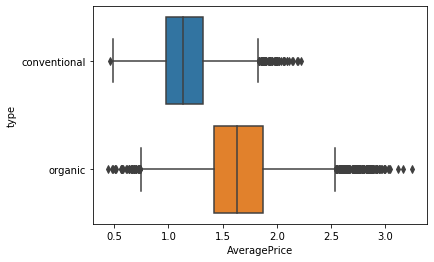

In [15]:
sns.boxplot(y="type", x="AveragePrice", data=df)

The above boxplot shows that the average prcie of organic avocado is more that the conventional avocado.

In [16]:
#Fields of the datasets:
df.keys()

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [17]:
#Finding out the datatypes:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

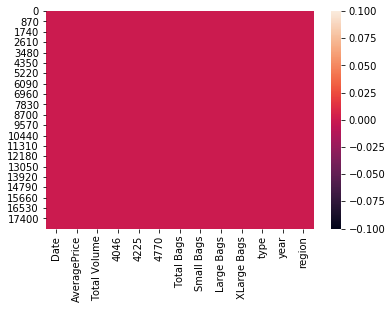

In [18]:
sns.heatmap(df.isnull())

In [19]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [20]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [21]:
df.shape

(18249, 13)

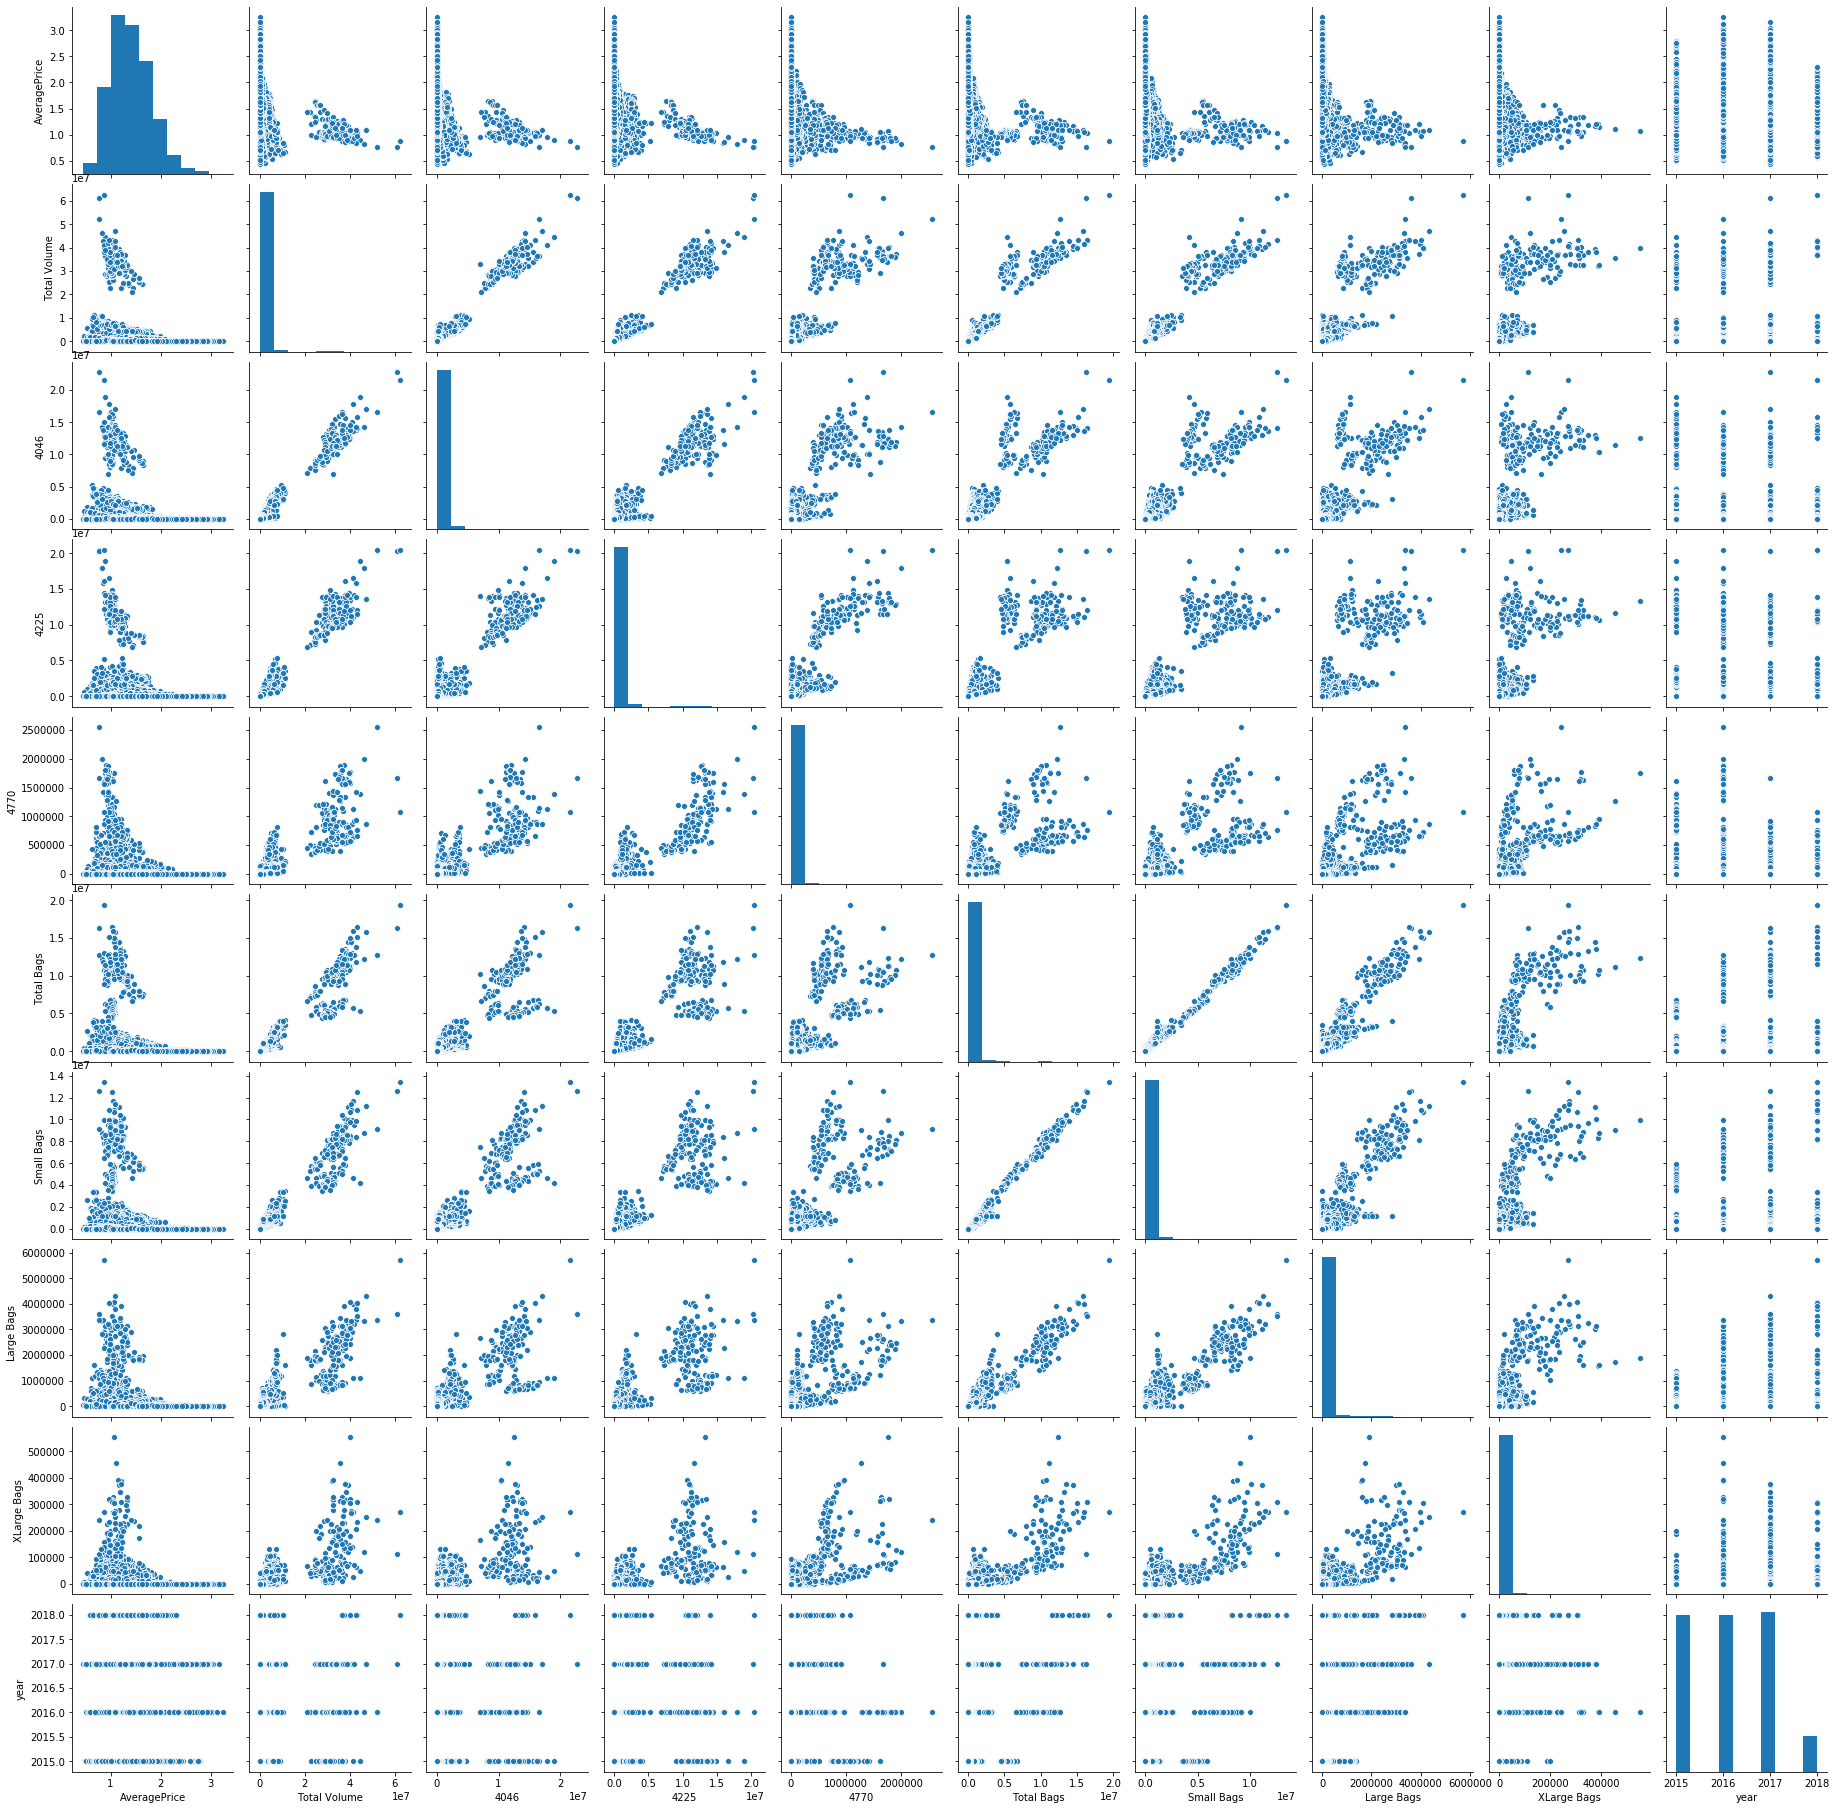

In [22]:
sns.pairplot(df)

Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, "/" -->shows the positive corelation where as "" -->shows negative corelation for some there are holizontal lines which shows neutral relationship with each other.


Through the above and below graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking them in to the consideration.


These fields are :
'AveragePrice', 'Total Volume', 
'4046', '4225', '4770',
'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 
'type', 'year'.


These fields are some what showing positive or neutral correlation with each other.



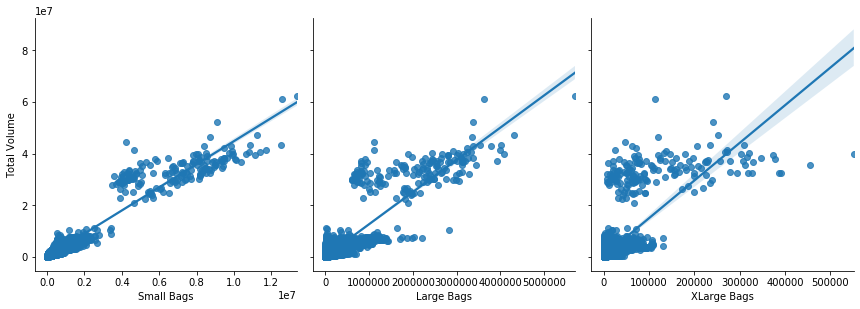

In [23]:
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Volume', size=4, aspect=1, kind='reg')

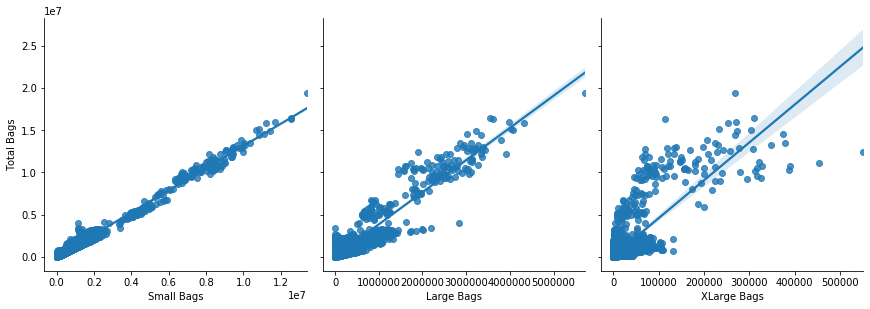

In [24]:
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', size=4, aspect=1, kind='reg')

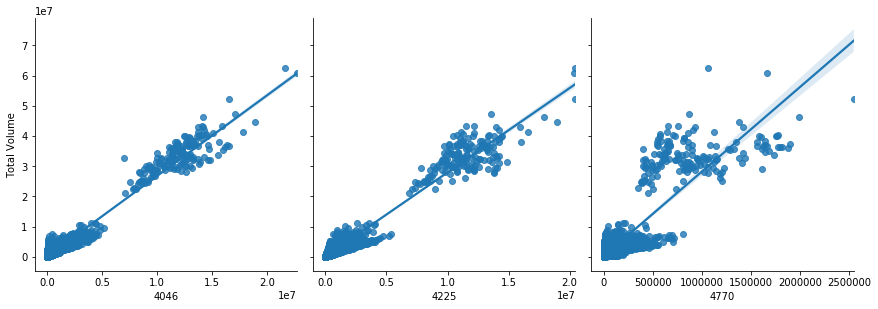

In [25]:
sns.pairplot(df, x_vars=['4046', '4225', '4770'], y_vars='Total Volume', size=4, aspect=1, kind='reg')

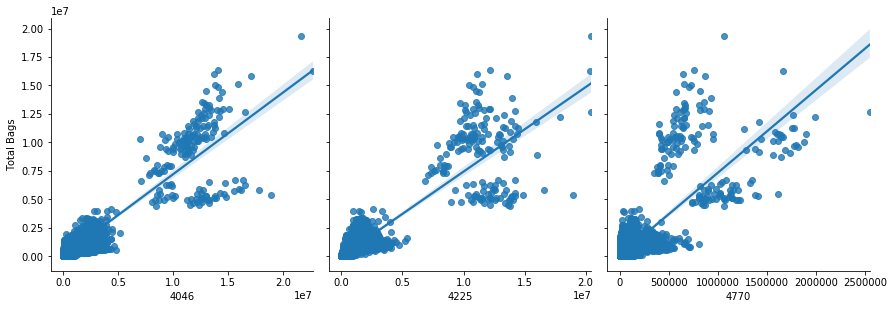

In [26]:
sns.pairplot(df, x_vars=['4046', '4225', '4770'], y_vars='Total Bags', size=4, aspect=1, kind='reg')

Plotting the above graphs, in order to know that how the variables are corelating with "Total Volumes" and "Total Bags" field, where we see that :

Strong Positive correlation:

'4046', '4225', '4770'.

'Small Bags', 'Large Bags', 'XLarge Bags'.



The below graph shows is the stucture of corelation between each of the variables with respect to the heatmap.The black dots represent negative corelation where as off white color shows the positive corelation.

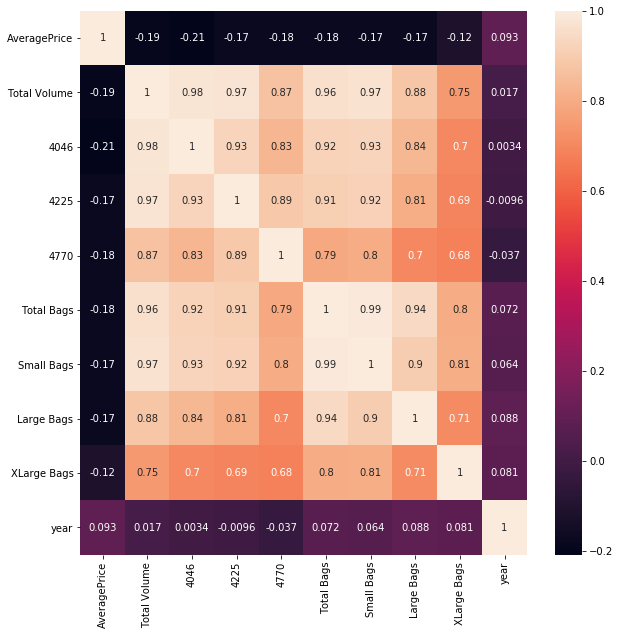

In [27]:
corr_hmap=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

AveragePrice       AxesSubplot(0.125,0.536818;0.065678x0.343182)
Total Volume    AxesSubplot(0.203814,0.536818;0.065678x0.343182)
4046            AxesSubplot(0.282627,0.536818;0.065678x0.343182)
4225            AxesSubplot(0.361441,0.536818;0.065678x0.343182)
4770            AxesSubplot(0.440254,0.536818;0.065678x0.343182)
Total Bags      AxesSubplot(0.519068,0.536818;0.065678x0.343182)
Small Bags      AxesSubplot(0.597881,0.536818;0.065678x0.343182)
Large Bags      AxesSubplot(0.676695,0.536818;0.065678x0.343182)
XLarge Bags     AxesSubplot(0.755508,0.536818;0.065678x0.343182)
year            AxesSubplot(0.834322,0.536818;0.065678x0.343182)
dtype: object

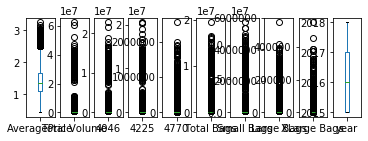

In [28]:
df.plot(kind='box',subplots=True, layout=(2,10))

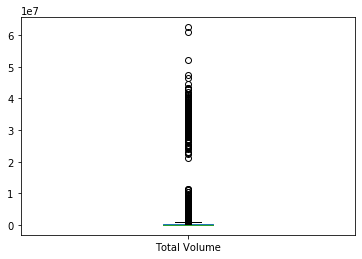

In [29]:
df['Total Volume'].plot.box()

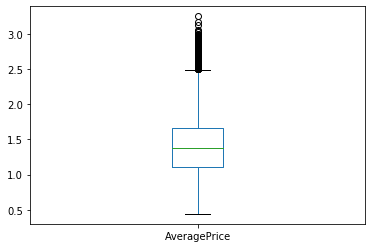

In [30]:
df['AveragePrice'].plot.box()

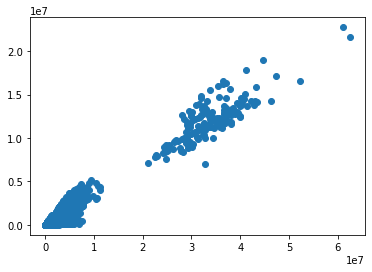

In [31]:
plt.scatter(df.iloc[:,2],df.iloc[:,3])
plt.show()

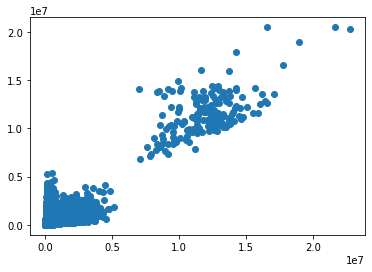

In [32]:
plt.scatter(df.iloc[:,3],df.iloc[:,4])
plt.show()

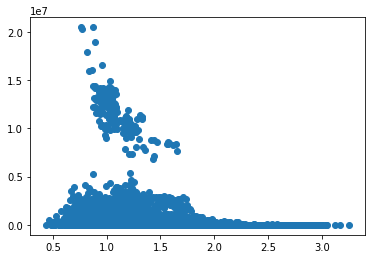

In [33]:
plt.scatter(df.iloc[:,1],df.iloc[:,4])
plt.show()

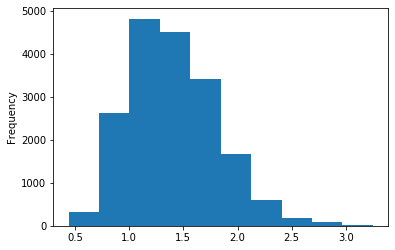

In [34]:
#Average price mostly lies between $1 to $1.5
df['AveragePrice'].plot.hist()

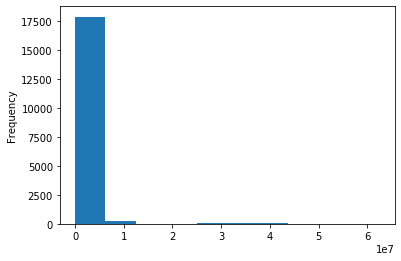

In [35]:
#Total Volumes
df['Total Volume'].plot.hist()

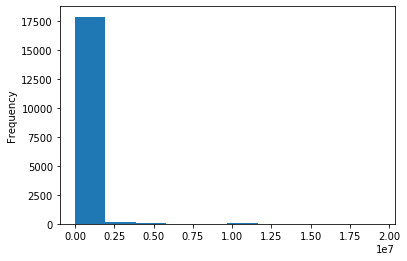

In [36]:
#Total Bags
df['Total Bags'].plot.hist()

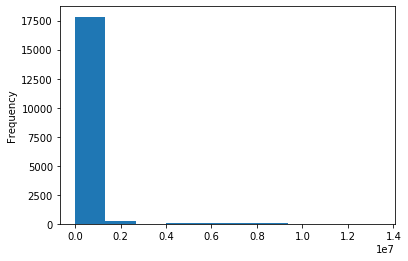

In [37]:
#Small Bags
df['Small Bags'].plot.hist()

# Region Vs AveragePrice distribution

The below grapgh here will show the Region wise distribution of the average price.

Type : Organic or conventional

Text(0.5, 1.0, 'Average Price in Each Region')

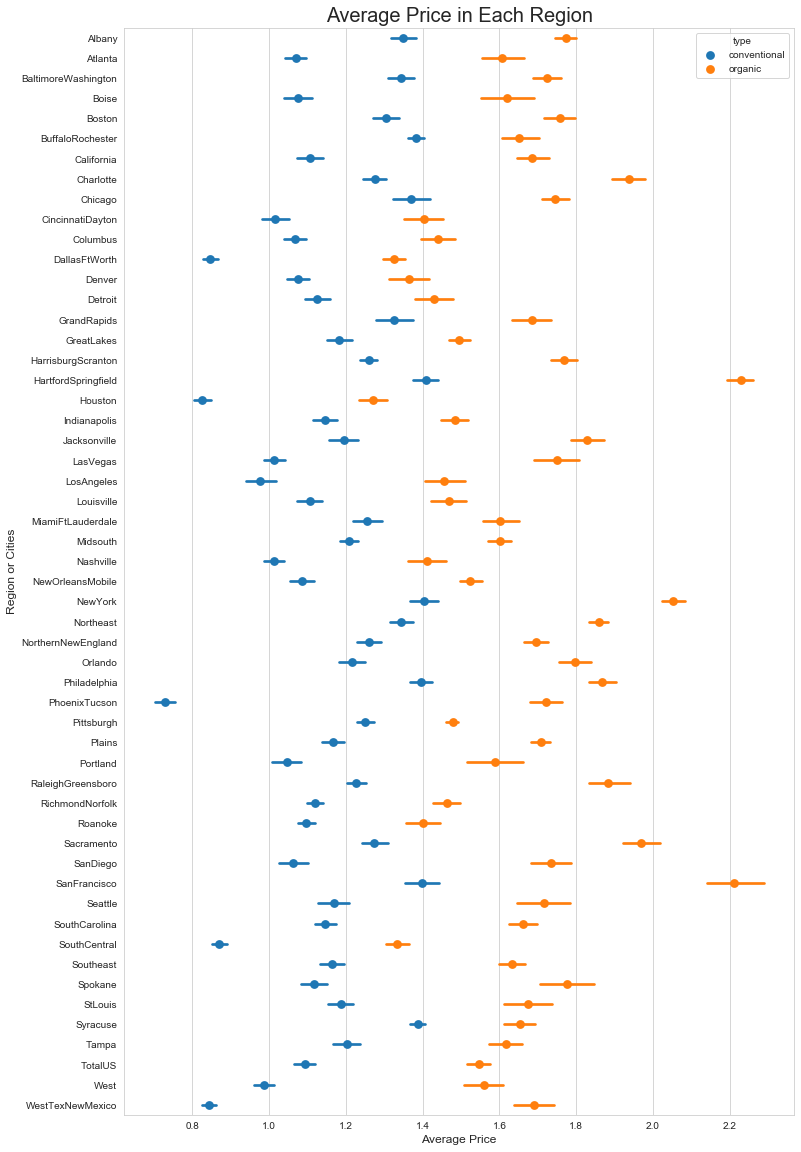

In [38]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region', data=df, hue='type',join=False)
plt.xlabel('Average Price',{'fontsize' : 'large'})
plt.ylabel('Region or Cities',{'fontsize':'large'})
plt.title("Average Price in Each Region",{'fontsize':20})

The below grapgh here will show the Region wise distribution of the average price

Year: 2015 , 2016 , 2017 , 2018.

Text(0.5, 1.0, 'Average Price in Each Region')

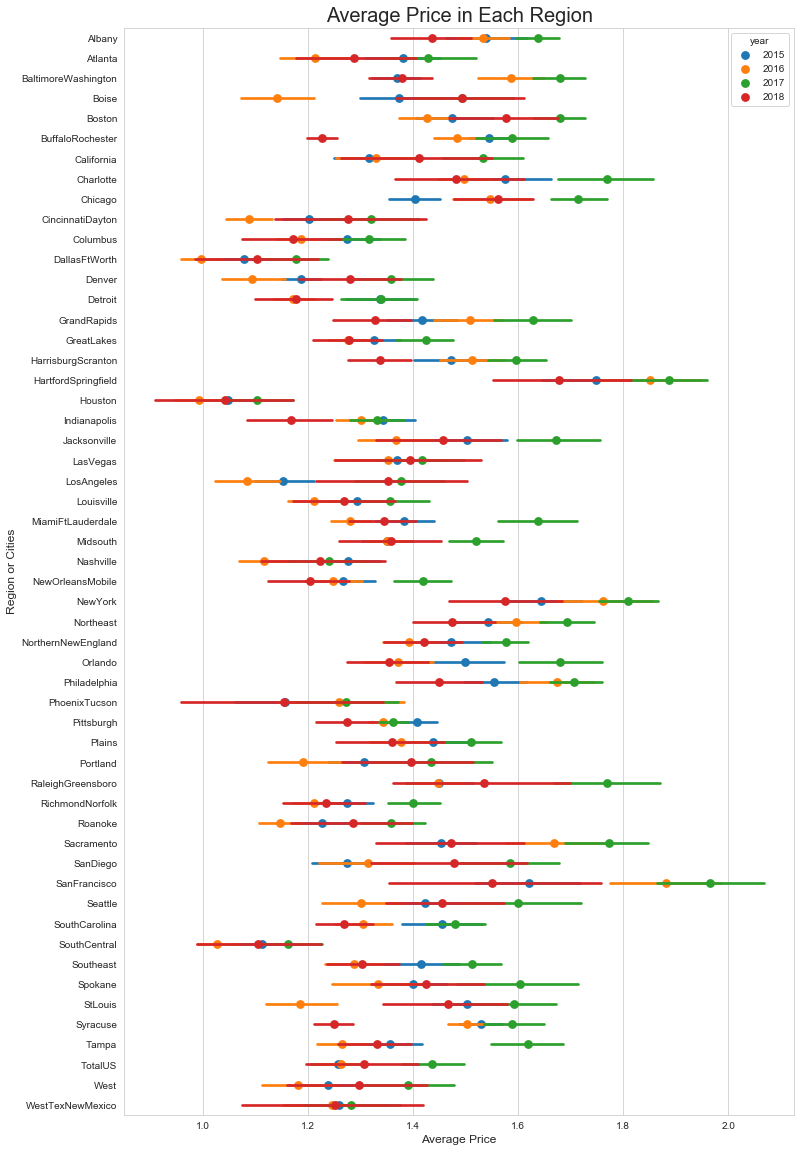

In [39]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region', data=df, hue='year',join=False)
plt.xlabel('Average Price',{'fontsize' : 'large'})
plt.ylabel('Region or Cities',{'fontsize':'large'})
plt.title("Average Price in Each Region",{'fontsize':20})

# Assigning X AND Y Variables:

In [40]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [41]:
x=df.iloc[:,1:-3]
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0


In [42]:
x.shape

(18249, 9)

In [43]:
y=df.iloc[:,-3]
y

0        conventional
1        conventional
2        conventional
3        conventional
4        conventional
             ...     
18244         organic
18245         organic
18246         organic
18247         organic
18248         organic
Name: type, Length: 18249, dtype: object

# Using Label Encoder

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

# MODEL SELECTION

Using different types of model in oder to acquire optimum solution:

# Linnear Regression

In [45]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.38591672036604596
r2_score corresponding to random state:  43 is:  0.4077617162874002
r2_score corresponding to random state:  44 is:  0.38472418317506174
r2_score corresponding to random state:  45 is:  0.3887540871961045
r2_score corresponding to random state:  46 is:  0.3865977721698962
r2_score corresponding to random state:  47 is:  0.4028957450058792
r2_score corresponding to random state:  48 is:  0.4133452347254176
r2_score corresponding to random state:  49 is:  0.40903071977187755
r2_score corresponding to random state:  50 is:  0.41727995593379497
r2_score corresponding to random state:  51 is:  0.40731135152121745
r2_score corresponding to random state:  52 is:  0.39847556566520115
r2_score corresponding to random state:  53 is:  0.399205691736116
r2_score corresponding to random state:  54 is:  0.381395965282988
r2_score corresponding to random state:  55 is:  0.4045951890197331
r2_score corresponding to random state:  56 

# Logistic Regression
# Gaussian NB
# SVC
# Decision Tree Classifier
# KNeighbors Classifier

In [46]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state= 9,stratify=y)

In [47]:
print(x_train.shape,x_test.shape)

(12774, 9) (5475, 9)


In [48]:
print(y_train.shape,y_test.shape)

(12774,) (5475,)


In [49]:
LOR=LogisticRegression()
GNB=GaussianNB()
SVC=SVC()
DTC=DecisionTreeClassifier(random_state=10)
KNN=KNeighborsClassifier()

In [50]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [51]:
models= []
models.append(('LogisticRegression',LOR))
models.append(('GaussianNB',GNB))
models.append(('SVC',SVC))
models.append(('DecisionTreeClassifier',DTC))
models.append(('KNeighborsClassifie',KNN))

**************** LogisticRegression ****************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY SCORE IS =  0.9362557077625571


CROSS_VAL_SCORE =  0.8877776075462629


ROC_AUC_SCORE =  0.9362620107591422


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.97      0.90      0.93      2738
           1       0.91      0.97      0.94      2737

    accuracy                           0.94      5475
   macro avg       0.94      0.94      0.94      5475
weighted avg       0.94      0.94      0.94      5475



CONFUSION MATRIX [[2469  269]
 [  80 2657]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


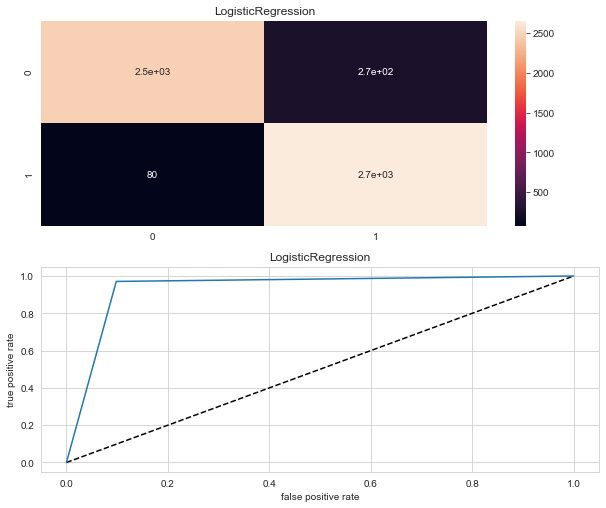




**************** GaussianNB ****************


GaussianNB(priors=None, var_smoothing=1e-09)


ACCURACY SCORE IS =  0.845662100456621


CROSS_VAL_SCORE =  0.8473350757029561


ROC_AUC_SCORE =  0.8456856144179017


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.97      0.72      0.82      2738
           1       0.77      0.97      0.86      2737

    accuracy                           0.85      5475
   macro avg       0.87      0.85      0.84      5475
weighted avg       0.87      0.85      0.84      5475



CONFUSION MATRIX [[1963  775]
 [  70 2667]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


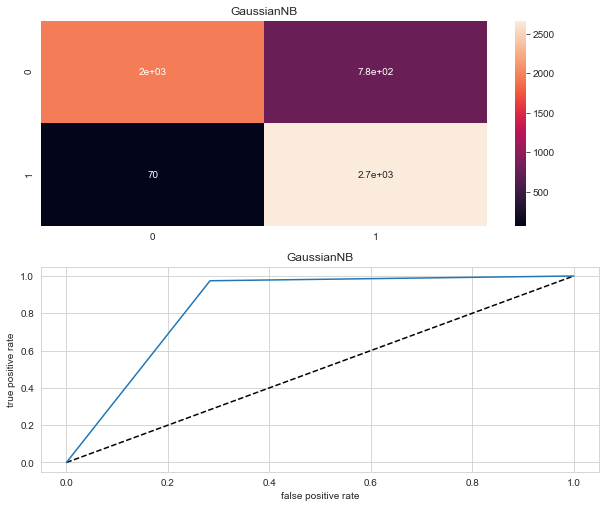




**************** SVC ****************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


ACCURACY SCORE IS =  0.891324200913242


CROSS_VAL_SCORE =  0.8946761595770247


ROC_AUC_SCORE =  0.8913326374790396


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.93      0.85      0.89      2738
           1       0.86      0.94      0.90      2737

    accuracy                           0.89      5475
   macro avg       0.89      0.89      0.89      5475
weighted avg       0.89      0.89      0.89      5475



CONFUSION MATRIX [[2314  424]
 [ 171 2566]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


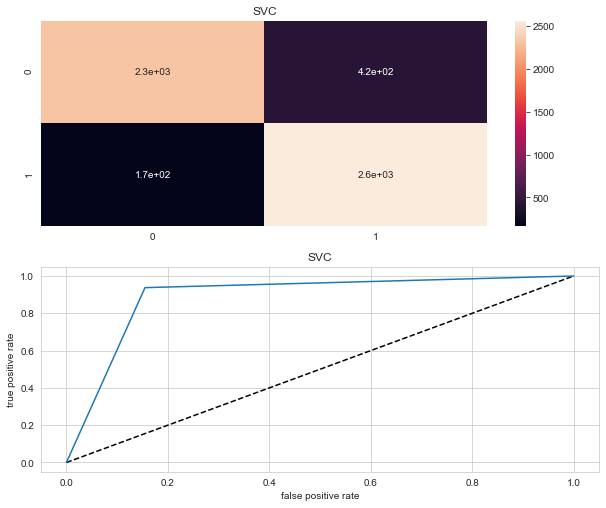




**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')


ACCURACY SCORE IS =  0.982283105022831


CROSS_VAL_SCORE =  0.9622428502763759


ROC_AUC_SCORE =  0.9822828041878294


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.98      0.98      0.98      2738
           1       0.98      0.98      0.98      2737

    accuracy                           0.98      5475
   macro avg       0.98      0.98      0.98      5475
weighted avg       0.98      0.98      0.98      5475



CONFUSION MATRIX [[2694   44]
 [  53 2

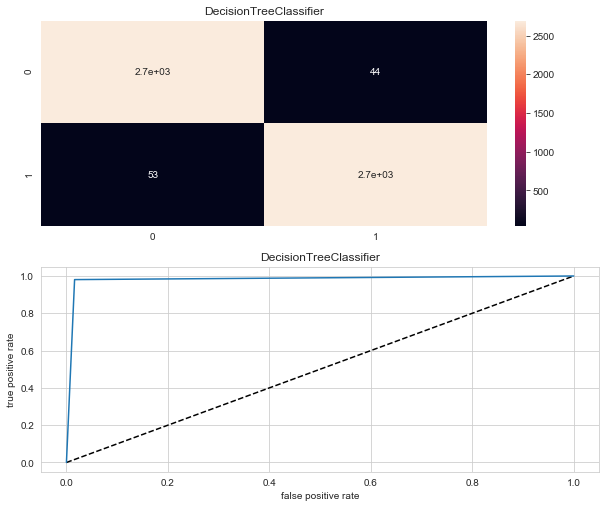




**************** KNeighborsClassifie ****************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


ACCURACY SCORE IS =  0.970593607305936


CROSS_VAL_SCORE =  0.9388454397981254


ROC_AUC_SCORE =  0.970592572151292


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.97      0.98      0.97      2738
           1       0.98      0.96      0.97      2737

    accuracy                           0.97      5475
   macro avg       0.97      0.97      0.97      5475
weighted avg       0.97      0.97      0.97      5475



CONFUSION MATRIX [[2673   65]
 [  96 2641]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


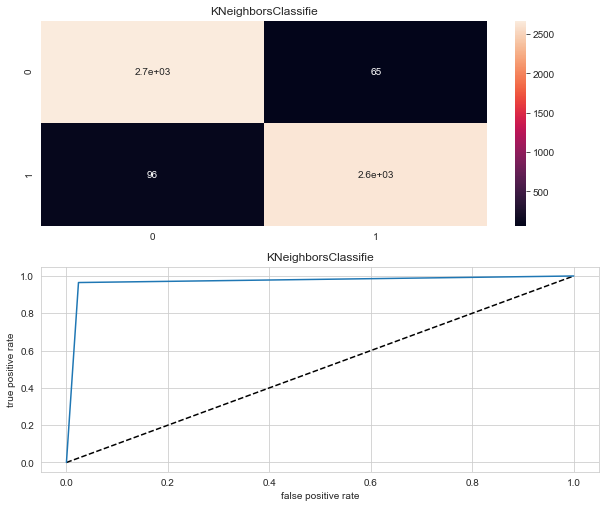

In [52]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('****************',name,'****************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS= accuracy_score(y_test,pred)
    print('ACCURACY SCORE IS = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('CROSS_VAL_SCORE = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_SCORE = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('CLASSIFICATION REPORT = ',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('CONFUSION MATRIX',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %.2f'% roc_auc)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title(name)
    plt.show()
    print('\n\n')

# Results:

In [53]:
result=pd.DataFrame({'Model': Model,'Accuracy_score': score,'Cross_val_score': cvs,'Roc_auc_curve': rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,93.625571,88.777761,93.626201
1,GaussianNB,84.566210,84.733508,84.568561
2,SVC,89.132420,89.467616,89.133264
3,DecisionTreeClassifier,98.228311,96.224285,98.228280
4,KNeighborsClassifie,97.059361,93.884544,97.059257


I choose Decision Tree Classifier as my preferred model from the above 6 model tested, as this model is performing the best on the given dataset

                       
DecisionTreeClassifier	

Accuracy score= 98.228311	  
Cross_val_score= 96.224285	
Roc_auc_curve= 98.228280

# Random Forest Regressor With GridSearchCV:--->

In [54]:
from math import log
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 30}

In [55]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=42,stratify=y)
rfr2=RandomForestRegressor(bootstrap=False,max_features='sqrt',min_samples_split=2,n_estimators=30)
rfr2.fit(x_train, y_train)
rfr2.score(x_train,y_train)
pred1=rfr2.predict(x_test)
rfr2.score(x_train,y_train)

1.0

In [56]:
pred1

array([0., 0., 1., ..., 0., 0., 1.])

# Choosing the model:-->

I am going to choose the Random Forest Regressor as the best and final Model 

Thiss model has pridicted our classification result such that the outcome of this project would be 100% though it is not possible to obtain 100% in any given dataset thus we can say here that the above model will give the best output or result.

# Saving the model:-->

In [57]:
from sklearn.externals import joblib

In [58]:
joblib.dump(rfr2,'Project_3_Classification_Avocaado_analysis.obj')

['Project_3_Classification_Avocaado_analysis.obj']

In [59]:
model=joblib.load('Project_3_Classification_Avocaado_analysis.obj')

In [60]:
#Pridicting x_test Classification = rfr2
rfr2.predict(x_test)

array([0., 0., 1., ..., 0., 0., 1.])

# 2 Predicting the Average Price of the Avocado

In [61]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [62]:
df1=pd.DataFrame(data=df)
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [63]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [64]:
#Droppig of the columns:
df1.drop(['Date', 'Total Volume', 'Total Bags', 'region', 'year',], axis = 1,inplace = True)

In [65]:
df1.tail()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic
18248,1.62,2894.77,2356.13,224.53,11988.14,26.01,0.0,organic


In [66]:
#Replacing the values of the type in to 0 and 1 :
df1["type"].replace({"conventional":0,"organic":1},inplace=True)
print(df1)

       AveragePrice     4046       4225    4770  Small Bags  Large Bags  \
0              1.33  1036.74   54454.85   48.16     8603.62       93.25   
1              1.35   674.28   44638.81   58.33     9408.07       97.49   
2              0.93   794.70  109149.67  130.50     8042.21      103.14   
3              1.08  1132.00   71976.41   72.58     5677.40      133.76   
4              1.28   941.48   43838.39   75.78     5986.26      197.69   
...             ...      ...        ...     ...         ...         ...   
18244          1.63  2046.96    1529.20    0.00    13066.82      431.85   
18245          1.71  1191.70    3431.50    0.00     8940.04      324.80   
18246          1.87  1191.92    2452.79  727.94     9351.80       42.31   
18247          1.93  1527.63    2981.04  727.01    10919.54       50.00   
18248          1.62  2894.77    2356.13  224.53    11988.14       26.01   

       XLarge Bags  type  
0              0.0     0  
1              0.0     0  
2              0.0

In [67]:
df1.head(2)

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0


In [68]:
df1.dtypes

AveragePrice    float64
4046            float64
4225            float64
4770            float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
dtype: object

In [69]:
df1.isnull().sum()

AveragePrice    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
dtype: int64

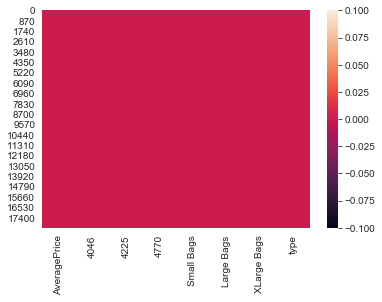

In [70]:
sns.heatmap(df1.isnull())

# Checking Skewness
This tecnique is implemented to watchout for any data that is skewed or not.

In [71]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [72]:
#Treatment for the skewed data:
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

In [73]:
df1.skew()

AveragePrice    0.138629
4046           -0.328195
4225           -0.486654
4770            0.099986
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
dtype: float64

# Standard Scaler

The idea behind StandardScaler is that it is going to transform your data such that the distribution will have a mean value=0 and standard deviation=1. In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(df1)
df1_avo_scaler = scaler.transform(df1)
df1_avo = pd.DataFrame(df1_avo_scaler)
df1_avo.columns = ['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Type']
df1_avo.head(10)

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,Type
0,-0.111918,-0.609752,0.374936,-0.279143,-0.247796,-0.669747,-0.645526,-0.999836
1,-0.060020,-0.737707,0.305200,-0.233838,-0.213093,-0.658279,-0.645526,-0.999836
2,-1.255560,-0.688840,0.618892,-0.042078,-0.273995,-0.643743,-0.645526,-0.999836
3,-0.801087,-0.583598,0.472808,-0.181974,-0.409182,-0.576571,-0.645526,-0.999836
4,-0.243636,-0.638425,0.298852,-0.171717,-0.388616,-0.475393,-0.645526,-0.999836
5,-0.297133,-0.570167,0.331167,-0.302543,-0.353293,-0.589089,-0.645526,-0.999836
6,-1.069669,-0.527051,0.480981,-0.122298,-0.266602,-0.600261,-0.645526,-0.999836
7,-1.100259,-0.724986,0.594488,-0.158826,-0.370832,-0.203799,-0.645526,-0.999836
8,-0.978816,-0.613968,0.540587,-0.143444,-0.148726,-0.381540,-0.645526,-0.999836
9,-0.830350,-0.671503,0.435728,-0.076486,-0.273066,-0.202839,-0.645526,-0.999836


AveragePrice       AxesSubplot(0.125,0.536818;0.133621x0.343182)
4046            AxesSubplot(0.285345,0.536818;0.133621x0.343182)
4225             AxesSubplot(0.44569,0.536818;0.133621x0.343182)
4770            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Small Bags      AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Large Bags            AxesSubplot(0.125,0.125;0.133621x0.343182)
XLarge Bags        AxesSubplot(0.285345,0.125;0.133621x0.343182)
Type                AxesSubplot(0.44569,0.125;0.133621x0.343182)
dtype: object

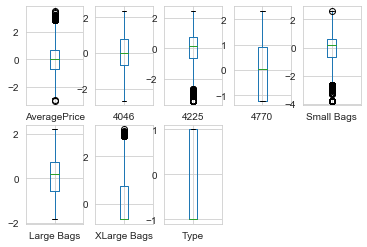

In [75]:
df1_avo.plot(kind='box',subplots=True, layout=(2,5))

# Removing Outliers
Removing the outliers from the data by using Z_SCORE

In [76]:
from scipy.stats import zscore
z_score=abs(zscore(df1_avo))
print(df1_avo.shape)

(18249, 8)


In [77]:
df2=df1_avo.loc[(z_score<3).all(axis=1)]
print(df2.shape)

(17953, 8)


# Assigning X AND Y Variables:

In [78]:
df2.head(2)

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,Type
0,-0.111918,-0.609752,0.374936,-0.279143,-0.247796,-0.669747,-0.645526,-0.999836
1,-0.060020,-0.737707,0.305200,-0.233838,-0.213093,-0.658279,-0.645526,-0.999836


In [79]:
x=df2.iloc[:,1:8]
x.shape
x

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,Type
0,-0.609752,0.374936,-0.279143,-0.247796,-0.669747,-0.645526,-0.999836
1,-0.737707,0.305200,-0.233838,-0.213093,-0.658279,-0.645526,-0.999836
2,-0.688840,0.618892,-0.042078,-0.273995,-0.643743,-0.645526,-0.999836
3,-0.583598,0.472808,-0.181974,-0.409182,-0.576571,-0.645526,-0.999836
4,-0.638425,0.298852,-0.171717,-0.388616,-0.475393,-0.645526,-0.999836
...,...,...,...,...,...,...,...
18244,-0.407310,-0.878279,-1.217613,-0.085548,-0.272479,-0.645526,1.000164
18245,-0.568306,-0.594835,-1.217613,-0.232904,-0.346517,-0.645526,1.000164
18246,-0.568251,-0.712597,0.370548,-0.215422,-0.872380,-0.645526,1.000164
18247,-0.494407,-0.644192,0.370240,-0.155249,-0.829787,-0.645526,1.000164


In [80]:
y=df2.iloc[:,0:1]
y.shape
y

,AveragePrice
0,-0.111918
1,-0.060020
2,-1.255560
3,-0.801087
4,-0.243636
...,...
18244,0.623491
18245,0.805435
18246,1.153743
18247,1.279375


# MODEL SELECTION

# Linnear Regression

In [81]:
from sklearn import linear_model

In [82]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.45559341214210114
r2_score corresponding to random state:  43 is:  0.4486603725494218
r2_score corresponding to random state:  44 is:  0.45010279046140256
r2_score corresponding to random state:  45 is:  0.446233033129253
r2_score corresponding to random state:  46 is:  0.44974084146422055
r2_score corresponding to random state:  47 is:  0.45321945548787934
r2_score corresponding to random state:  48 is:  0.45436866459963887
r2_score corresponding to random state:  49 is:  0.4526760695186782
r2_score corresponding to random state:  50 is:  0.45286776755388336
r2_score corresponding to random state:  51 is:  0.4626144720332126
r2_score corresponding to random state:  52 is:  0.45035789368915113
r2_score corresponding to random state:  53 is:  0.47003670059803226
r2_score corresponding to random state:  54 is:  0.44433726553228003
r2_score corresponding to random state:  55 is:  0.46192527270684125
r2_score corresponding to random state:

# Cross_val_score:

In [83]:
cross_val_score(lr,x,y,cv=5,scoring='r2').mean()

0.0035939262277562057

In [84]:
cross_val_score(lr,x,y,cv=5,scoring='r2').std()

0.2971497645617558

In [85]:
#predicting the Average Pricing of the Avocado:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=79)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [86]:
y_pred

array([[ 0.1352094 ],
       [-0.76036311],
       [ 0.63543627],
       ...,
       [-0.15412619],
       [ 0.59706872],
       [-0.36951701]])

# Lasso

In [87]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
isreh=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
grid=GridSearchCV(isreh,parameters,cv=10)
grid.fit(x,y)
grid.best_params_

{'alpha': 0.01}

In [88]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=r_state)
    lasso=Lasso(alpha=0.01)
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.45369390875332705
r2_score corresponding to random state:  43 is:  0.4465418172385406
r2_score corresponding to random state:  44 is:  0.4487203982652763
r2_score corresponding to random state:  45 is:  0.4422380917664539
r2_score corresponding to random state:  46 is:  0.4487194441493537
r2_score corresponding to random state:  47 is:  0.4512615159072897
r2_score corresponding to random state:  48 is:  0.45121489456294606
r2_score corresponding to random state:  49 is:  0.45247543018927283
r2_score corresponding to random state:  50 is:  0.44897428330340994
r2_score corresponding to random state:  51 is:  0.4611770525993637
r2_score corresponding to random state:  52 is:  0.4496263485419457
r2_score corresponding to random state:  53 is:  0.4668761075058425
r2_score corresponding to random state:  54 is:  0.4446216254201203
r2_score corresponding to random state:  55 is:  0.460592596067367
r2_score corresponding to random state:  56 i

# Errors: 

In [89]:

print("r2 score is : ",r2_score(y_test,y_pred))
print('Mean absolute error : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared error : ',mean_squared_error(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is :  0.4553561324411254
Mean absolute error :  0.5731855960986174
Mean Squared error :  0.5460440315147906
RMSE is :  0.7389479220586459


# Random Forest Regressor With GridSearchCV:--->

In [90]:
from math import log
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [91]:
#to find out the best parameters in the random forest regressor:
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 30}

In [92]:
rf1=RandomForestRegressor(bootstrap=False,max_features='log2',min_samples_split=2,n_estimators=30)
rf1.fit(x_train, y_train)
rf1.score(x_train,y_train)
pred=rf1.predict(x_test)

In [93]:
pred

array([ 0.05775997, -0.41251952, -0.27916898, ..., -1.48415619,
       -1.32029911, -0.38481335])

In [94]:
rf1.score(x_train,y_train)

1.0

# Choosing The Model

Columns such as Type of avocado, size and bags had a great impact on Average Price of the Avocados.

RMSE value was accurate for the model, when we consider the applied dataset.

Where as I am going to choose, Random forest Regressor, because it has more accuracy than Linear regression , Lasso model for this dataset ,

Our accuracy is more than 99% which is almost 100%.

Random forest Regressor model predicts the type of Avocado more accurately than Logistic regression and other models.

Random Forest Regressor model predicts the average price more accurately than linear regression and Lasso model.

# Saving The Model:---->

In [95]:
from sklearn.externals import joblib

In [96]:
joblib.dump(rf1,'Project_3_Averageprice_reg_Avocaado_analysis.obj')

['Project_3_Averageprice_reg_Avocaado_analysis.obj']

In [97]:
model=joblib.load('Project_3_Averageprice_reg_Avocaado_analysis.obj')

In [98]:
#Pridicting x_test Regression = rf1
rf1.predict(x_test)

array([ 0.05775997, -0.41251952, -0.27916898, ..., -1.48415619,
       -1.32029911, -0.38481335])